In [25]:
%reset -f
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
images_path = "/media/kalfasyan/DATADRIVE1/sticky_plates/2020/20200723/plates/results"
platename = "Herent_w29_1-90_F10_51 mm_ISO160_1-15 s_IncandescentWB.png"
image = cv2.imread(f"{images_path}/{platename}")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

804 insects counted in captured image.


Text(10, 4150, 'Herent_w29_1-90_F10_51 mm_ISO160_1-15 s_IncandescentWB.png')

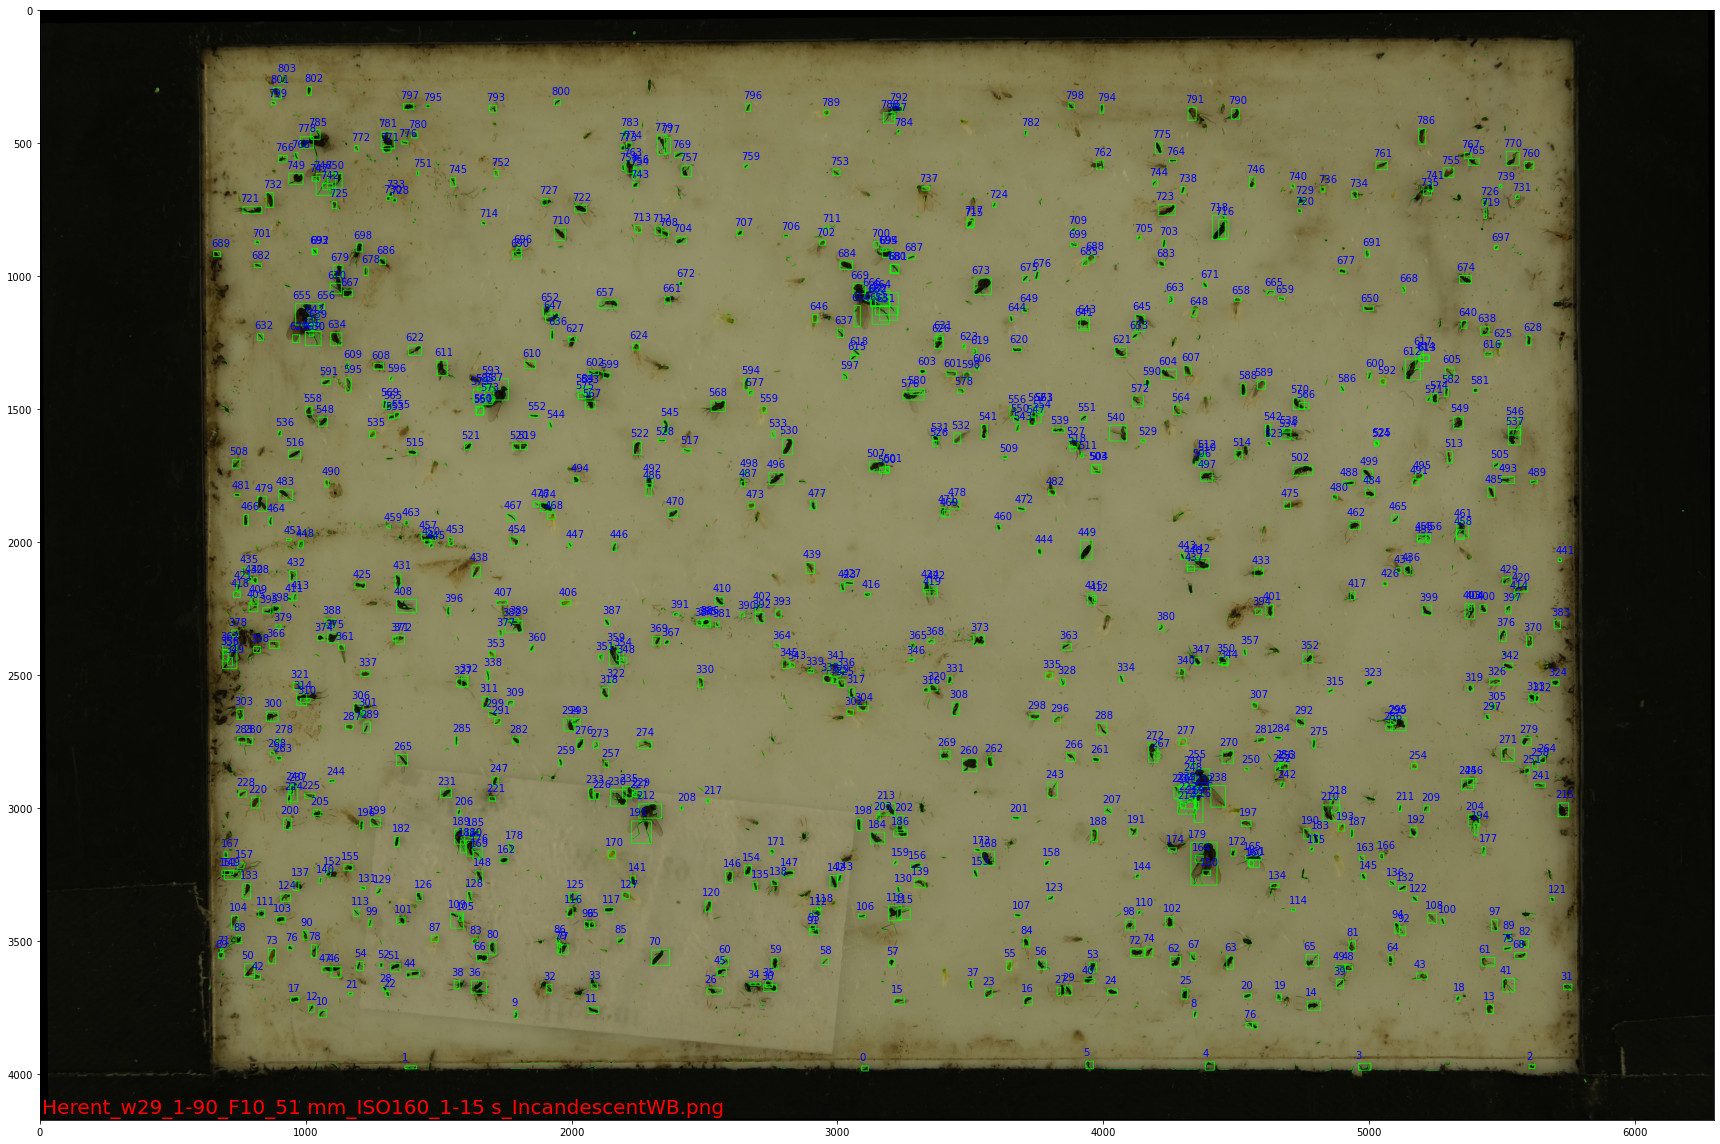

In [61]:
gray = image[:,:,2] #cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
filtered = cv2.medianBlur(gray, 5) # 13
edged = cv2.Canny(filtered, 100, 200)

# Highlighting detections
(cnts,_) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
edged_image = image.copy()
cv2.drawContours(edged_image, cnts, -1, (0, 255, 0), 1);

coordinates = []
for cnt in cnts:
    M = cv2.moments(cnt)
    try:
        cx = int(M['m10']/M['m00'])
    except:
        cx = np.nan
    try:
        cy = int(M['m01']/M['m00'])
    except:
        cy = np.nan
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)

    if (12 < area) and (40 < perimeter):
        if np.nan not in [cx, cy]:
            x,y,w,h = cv2.boundingRect(cnt)
            edged_image = cv2.rectangle(edged_image, (x,y), (x+w, y+h), (0,255,0), 2)
            coordinates.append((x,y))

print("{} insects counted in captured image.".format(len(coordinates)))

plt.figure(figsize=(30,24))
plt.imshow(edged_image)

for i, c in enumerate(coordinates):
    plt.text(c[0]-10, c[1]-20, i, c='blue')

plt.text(10,4150, platename, c='red', fontsize=20)

In [58]:
image.shape

(4174, 6297, 3)